In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings

from google.colab import drive

In [ ]:
drive.mount('/content/drive')
folderPath = "/content/drive/My Drive/TCC/"

df_acuracia = pd.read_csv(folderPath + "df_acuracia.csv")
df_measure = pd.read_csv(folderPath + "df_measure.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_measure

,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,...,Measure41,Measure42,Measure43,Measure44,Measure45,Measure46,Measure47,Measure48,Measure49,Measure50
0,0.677419,0.600000,0.677419,0.444444,0.764706,0.533333,0.764706,0.500000,0.721311,0.500000,...,0.777778,0.166667,0.777778,0.000000,0.756757,0.533333,0.756757,0.500000,0.760563,0.000000
1,0.753623,0.000000,0.736842,0.400000,0.923077,0.181818,0.600000,0.333333,0.985507,0.333333,...,1.000000,0.375000,0.675676,0.500000,0.861538,0.666667,0.564103,0.285714,0.564103,0.588235
2,0.590909,0.470588,0.590909,0.526316,0.727273,0.666667,0.727273,0.700000,0.769231,0.666667,...,0.622222,0.555556,0.622222,0.782609,0.680851,0.470588,0.681818,0.375000,0.595745,0.526316
3,0.844444,0.600000,0.653061,0.727273,1.000000,0.608696,0.553191,0.588235,0.827586,0.750000,...,0.867925,0.526316,0.746988,0.600000,0.746988,0.266667,0.843750,0.375000,0.843750,0.307692
4,0.781250,0.181818,0.781250,0.166667,0.800000,0.705882,0.800000,0.714286,0.727273,0.526316,...,0.707692,0.428571,0.700000,0.166667,0.722222,0.444444,0.935484,0.428571,0.746667,0.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.680000,0.526316,0.740741,0.266667,0.740741,0.555556,0.622222,0.555556,0.622222,0.700000,...,0.821429,0.470588,0.488889,0.571429,0.666667,0.545455,0.470588,0.285714,0.920000,0.400000
92,0.444444,0.727273,1.000000,0.666667,0.680000,0.727273,0.851852,0.666667,0.566667,0.375000,...,0.774194,0.444444,0.774194,0.533333,0.727273,0.777778,0.727273,0.700000,0.700000,0.600000
93,0.700000,0.571429,0.666667,0.375000,0.666667,0.400000,0.580645,0.470588,0.571429,0.533333,...,0.640000,0.470588,0.676471,0.555556,0.933333,0.666667,0.701299,0.571429,1.000000,0.153846
94,0.773333,0.777778,0.827586,0.750000,0.644068,0.461538,0.644068,0.461538,0.816901,0.500000,...,0.782609,0.421053,0.782609,0.470588,0.788732,0.625000,0.788732,0.615385,0.773333,0.444444


In [ ]:
df_measure['Name'] = ['df1 + MC + KNN + treino',
'df1 + MC + KNN + teste',
'df1 + MC + DT + treino',
'df1 + MC + DT + teste',
'df2 + MC + KNN + treino',
'df2 + MC + KNN + teste',
'df2 + MC + DT + treino',
'df2 + MC + DT + teste',
'df3 + MC + KNN + treino',
'df3 + MC + KNN + teste',
'df3 + MC + DT + treino',
'df3 + MC + DT + teste',
'df4 + MC + KNN + treino',
'df4 + MC + KNN + teste',
'df4 + MC + DT + treino',
'df4 + MC + DT + teste',
'df1 + CC + KNN + treino',
'df1 + CC + KNN + teste',
'df1 + CC + DT + treino',
'df1 + CC + DT + teste',
'df2 + CC + KNN + treino',
'df2 + CC + KNN + teste',
'df2 + CC + DT + treino',
'df2 + CC + DT + teste',
'df3 + CC + KNN + treino',
'df3 + CC + KNN + teste',
'df3 + CC + DT + treino',
'df3 + CC + DT + teste',
'df4 + CC + KNN + treino',
'df4 + CC + KNN + teste',
'df4 + CC + DT + treino',
'df4 + CC + DT + teste',
'df1 + PCA + MC + KNN + treino',
'df1 + PCA + MC + KNN + teste',
'df1 + PCA + MC + DT + treino',
'df1 + PCA + MC + DT + teste',
'df2 + PCA + MC + KNN + treino',
'df2 + PCA + MC + KNN + teste',
'df2 + PCA + MC + DT + treino',
'df2 + PCA + MC + DT + teste',
'df3 + PCA + MC + KNN + treino',
'df3 + PCA + MC + KNN + teste',
'df3 + PCA + MC + DT + treino',
'df3 + PCA + MC + DT + teste',
'df4 + PCA + MC + KNN + treino',
'df4 + PCA + MC + KNN + teste',
'df4 + PCA + MC + DT + treino',
'df4 + PCA + MC + DT + teste',
'df1 + PCA + CC + KNN + treino',
'df1 + PCA + CC + KNN + teste',
'df1 + PCA + CC + DT + treino',
'df1 + PCA + CC + DT + teste',
'df2 + PCA + CC + KNN + treino',
'df2 + PCA + CC + KNN + teste',
'df2 + PCA + CC + DT + treino',
'df2 + PCA + CC + DT + teste',
'df3 + PCA + CC + KNN + treino',
'df3 + PCA + CC + KNN + teste',
'df3 + PCA + CC + DT + treino',
'df3 + PCA + CC + DT + teste',
'df4 + PCA + CC + KNN + treino',
'df4 + PCA + CC + KNN + teste',
'df4 + PCA + CC + DT + treino',
'df4 + PCA + CC + DT + teste',
'df1 + AE + MC + KNN + treino',
'df1 + AE + MC + KNN + teste',
'df1 + AE + MC + DT + treino',
'df1 + AE + MC + DT + teste',
'df2 + AE + MC + KNN + treino',
'df2 + AE + MC + KNN + teste',
'df2 + AE + MC + DT + treino',
'df2 + AE + MC + DT + teste',
'df3 + AE + MC + KNN + treino',
'df3 + AE + MC + KNN + teste',
'df3 + AE + MC + DT + treino',
'df3 + AE + MC + DT + teste',
'df4 + AE + MC + KNN + treino',
'df4 + AE + MC + KNN + teste',
'df4 + AE + MC + DT + treino',
'df4 + AE + MC + DT + teste',
'df1 + AE + CC + KNN + treino',
'df1 + AE + CC + KNN + teste',
'df1 + AE + CC + DT + treino',
'df1 + AE + CC + DT + teste',
'df2 + AE + CC + KNN + treino',
'df2 + AE + CC + KNN + teste',
'df2 + AE + CC + DT + treino',
'df2 + AE + CC + DT + teste',
'df3 + AE + CC + KNN + treino',
'df3 + AE + CC + KNN + teste',
'df3 + AE + CC + DT + treino',
'df3 + AE + CC + DT + teste',
'df4 + AE + CC + KNN + treino',
'df4 + AE + CC + KNN + teste',
'df4 + AE + CC + DT + treino',
'df4 + AE + CC + DT + teste']

In [ ]:
col_to_move = df_measure.pop('Name')
df_measure.insert(0, 'Name', col_to_move)

In [ ]:
df = df_measure

In [ ]:
df1_treino = df[df['Name'].str.contains('df1') & df['Name'].str.contains('treino')]
df1_teste = df[df['Name'].str.contains('df1') & df['Name'].str.contains('teste')]
df2_treino = df[df['Name'].str.contains('df2') & df['Name'].str.contains('treino')]
df2_teste = df[df['Name'].str.contains('df2') & df['Name'].str.contains('teste')]
df3_treino = df[df['Name'].str.contains('df3') & df['Name'].str.contains('treino')]
df3_teste = df[df['Name'].str.contains('df3') & df['Name'].str.contains('teste')]
df4_treino = df[df['Name'].str.contains('df4') & df['Name'].str.contains('treino')]
df4_teste = df[df['Name'].str.contains('df4') & df['Name'].str.contains('teste')]

<ipython-input-149-5df5aaf0f52c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_treino['Name'] = pd.Categorical(df1_treino['Name'], categories=order, ordered=True)


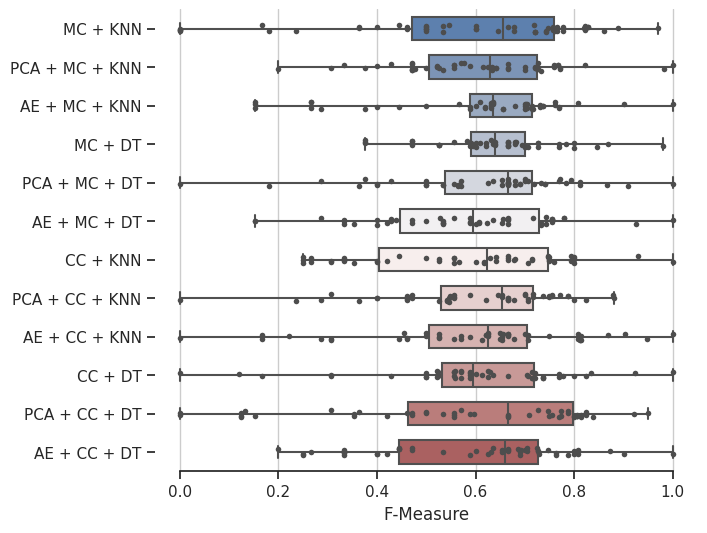

In [ ]:
#DF1 treino
order = ['df1 + MC + KNN + treino', 'df1 + PCA + MC + KNN + treino', 'df1 + AE + MC + KNN + treino',
         'df1 + MC + DT + treino', 'df1 + PCA + MC + DT + treino', 'df1 + AE + MC + DT + treino',
         'df1 + CC + KNN + treino', 'df1 + PCA + CC + KNN + treino', 'df1 + AE + CC + KNN + treino',
         'df1 + CC + DT + treino', 'df1 + PCA + CC + DT + treino', 'df1 + AE + CC + DT + treino']

df1_treino['Name'] = pd.Categorical(df1_treino['Name'], categories=order, ordered=True)
df = df1_treino.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df1 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ treino', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-150-a095fb6b4865>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_teste['Name'] = pd.Categorical(df1_teste['Name'], categories=order, ordered=True)


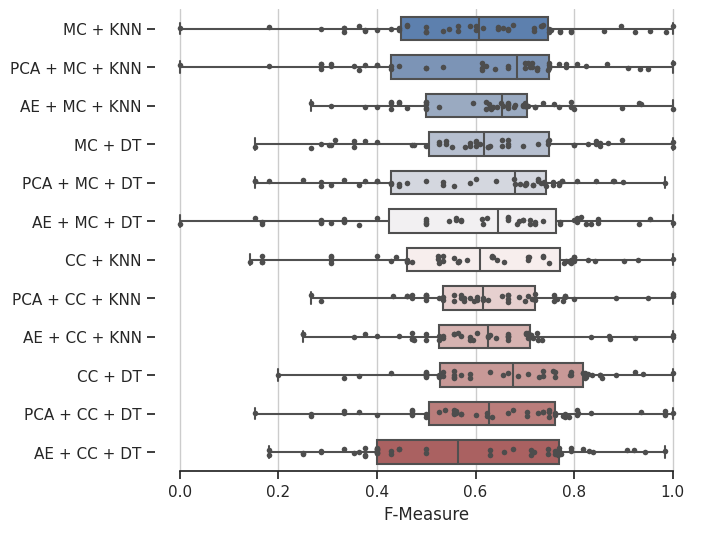

In [ ]:
#DF1 teste
order = ['df1 + MC + KNN + teste', 'df1 + PCA + MC + KNN + teste', 'df1 + AE + MC + KNN + teste',
         'df1 + MC + DT + teste', 'df1 + PCA + MC + DT + teste', 'df1 + AE + MC + DT + teste',
         'df1 + CC + KNN + teste', 'df1 + PCA + CC + KNN + teste', 'df1 + AE + CC + KNN + teste',
         'df1 + CC + DT + teste', 'df1 + PCA + CC + DT + teste', 'df1 + AE + CC + DT + teste']

df1_teste['Name'] = pd.Categorical(df1_teste['Name'], categories=order, ordered=True)
df = df1_teste.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df1 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ teste', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-151-471b10ed9393>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_treino['Name'] = pd.Categorical(df2_treino['Name'], categories=order, ordered=True)


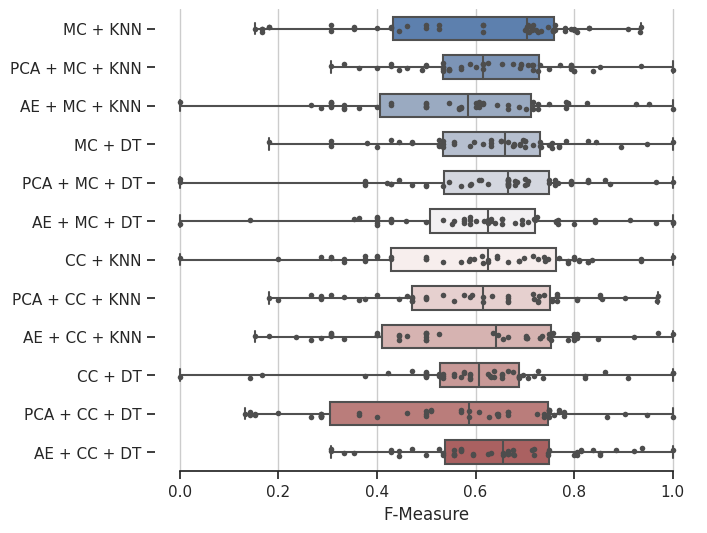

In [ ]:
#DF2 treino
order = ['df2 + MC + KNN + treino', 'df2 + PCA + MC + KNN + treino', 'df2 + AE + MC + KNN + treino',
         'df2 + MC + DT + treino', 'df2 + PCA + MC + DT + treino', 'df2 + AE + MC + DT + treino',
         'df2 + CC + KNN + treino', 'df2 + PCA + CC + KNN + treino', 'df2 + AE + CC + KNN + treino',
         'df2 + CC + DT + treino', 'df2 + PCA + CC + DT + treino', 'df2 + AE + CC + DT + treino']

df2_treino['Name'] = pd.Categorical(df2_treino['Name'], categories=order, ordered=True)
df = df2_treino.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df2 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ treino', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-152-54adcd6bd5eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_teste['Name'] = pd.Categorical(df2_teste['Name'], categories=order, ordered=True)


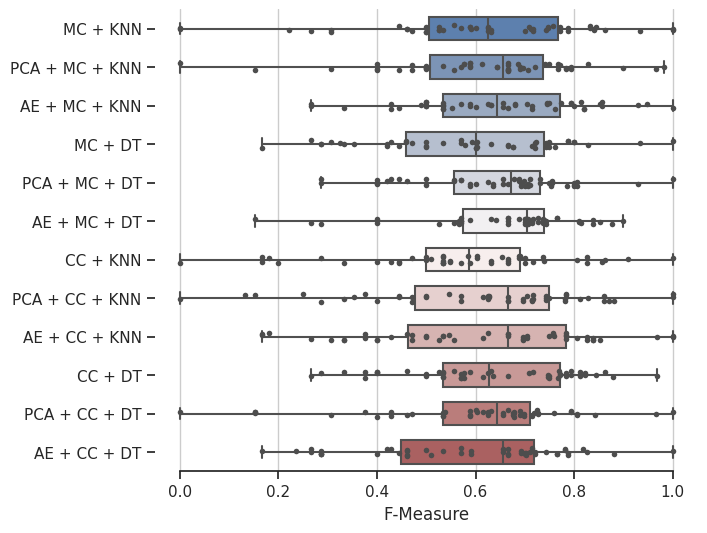

In [ ]:
#DF2 teste
order = ['df2 + MC + KNN + teste', 'df2 + PCA + MC + KNN + teste', 'df2 + AE + MC + KNN + teste',
         'df2 + MC + DT + teste', 'df2 + PCA + MC + DT + teste', 'df2 + AE + MC + DT + teste',
         'df2 + CC + KNN + teste', 'df2 + PCA + CC + KNN + teste', 'df2 + AE + CC + KNN + teste',
         'df2 + CC + DT + teste', 'df2 + PCA + CC + DT + teste', 'df2 + AE + CC + DT + teste']

df2_teste['Name'] = pd.Categorical(df2_teste['Name'], categories=order, ordered=True)
df = df2_teste.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df2 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ teste', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-153-b88c90b10daa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_treino['Name'] = pd.Categorical(df3_treino['Name'], categories=order, ordered=True)


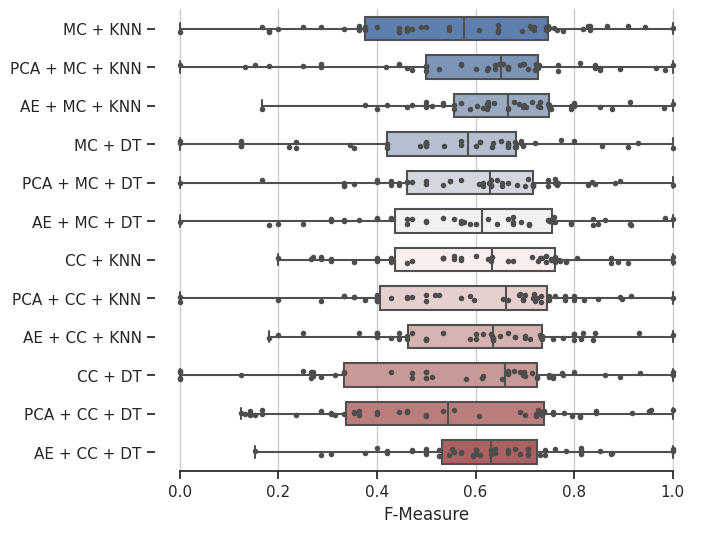

In [ ]:
#DF3 treino
order = ['df3 + MC + KNN + treino', 'df3 + PCA + MC + KNN + treino', 'df3 + AE + MC + KNN + treino',
         'df3 + MC + DT + treino', 'df3 + PCA + MC + DT + treino', 'df3 + AE + MC + DT + treino',
         'df3 + CC + KNN + treino', 'df3 + PCA + CC + KNN + treino', 'df3 + AE + CC + KNN + treino',
         'df3 + CC + DT + treino', 'df3 + PCA + CC + DT + treino', 'df3 + AE + CC + DT + treino']

df3_treino['Name'] = pd.Categorical(df3_treino['Name'], categories=order, ordered=True)
df = df3_treino.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df3 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ treino', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-154-172daed31982>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_teste['Name'] = pd.Categorical(df3_teste['Name'], categories=order, ordered=True)


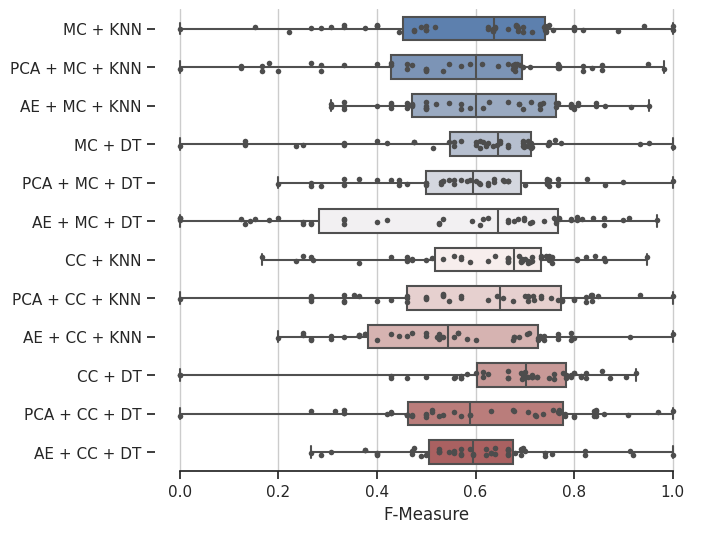

In [ ]:
#DF3 teste
order = ['df3 + MC + KNN + teste', 'df3 + PCA + MC + KNN + teste', 'df3 + AE + MC + KNN + teste',
         'df3 + MC + DT + teste', 'df3 + PCA + MC + DT + teste', 'df3 + AE + MC + DT + teste',
         'df3 + CC + KNN + teste', 'df3 + PCA + CC + KNN + teste', 'df3 + AE + CC + KNN + teste',
         'df3 + CC + DT + teste', 'df3 + PCA + CC + DT + teste', 'df3 + AE + CC + DT + teste']

df3_teste['Name'] = pd.Categorical(df3_teste['Name'], categories=order, ordered=True)
df = df3_teste.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df3 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ teste', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-155-33730b07b83d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_treino['Name'] = pd.Categorical(df4_treino['Name'], categories=order, ordered=True)


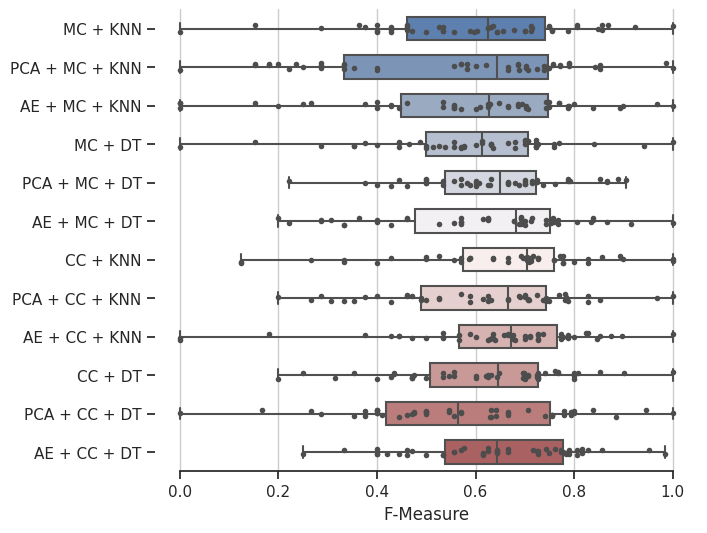

In [ ]:
#DF4 treino
order = ['df4 + MC + KNN + treino', 'df4 + PCA + MC + KNN + treino', 'df4 + AE + MC + KNN + treino',
         'df4 + MC + DT + treino', 'df4 + PCA + MC + DT + treino', 'df4 + AE + MC + DT + treino',
         'df4 + CC + KNN + treino', 'df4 + PCA + CC + KNN + treino', 'df4 + AE + CC + KNN + treino',
         'df4 + CC + DT + treino', 'df4 + PCA + CC + DT + treino', 'df4 + AE + CC + DT + treino']

df4_treino['Name'] = pd.Categorical(df4_treino['Name'], categories=order, ordered=True)
df = df4_treino.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df4 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ treino', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<ipython-input-156-56746bc302ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_teste['Name'] = pd.Categorical(df4_teste['Name'], categories=order, ordered=True)


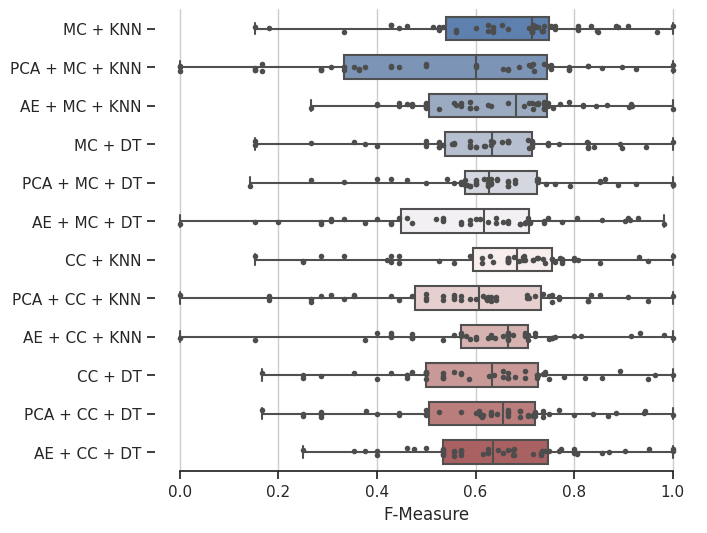

In [ ]:
#DF4 teste
order = ['df4 + MC + KNN + teste', 'df4 + PCA + MC + KNN + teste', 'df4 + AE + MC + KNN + teste',
         'df4 + MC + DT + teste', 'df4 + PCA + MC + DT + teste', 'df4 + AE + MC + DT + teste',
         'df4 + CC + KNN + teste', 'df4 + PCA + CC + KNN + teste', 'df4 + AE + CC + KNN + teste',
         'df4 + CC + DT + teste', 'df4 + PCA + CC + DT + teste', 'df4 + AE + CC + DT + teste']

df4_teste['Name'] = pd.Categorical(df4_teste['Name'], categories=order, ordered=True)
df = df4_teste.sort_values('Name')

df=pd.DataFrame(df)
df['Name'] = df['Name'].str.replace('df4 \+ ', '', regex=True)
df['Name'] = df['Name'].str.replace(' \+ teste', '', regex=True)
df.set_index('Name', inplace=True)
box = pd.DataFrame({ 'Name': np.tile(df.columns, len(df)), 'Metodo': df.index.repeat(df.shape[1]), 'F-Measure': df.values.ravel()})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="Metodo", x="F-Measure", data=box,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(y="Metodo", x="F-Measure", data=box,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [ ]:
media_acc = df_acuracia.mean(axis=1)
media_acc = media_acc.to_numpy().reshape(48,2)
media_acc = pd.DataFrame(media_acc)

In [ ]:
std_acc = df_acuracia.std(axis=1)
#std_acc = std_acc.to_numpy().reshape(48,2)
#std_acc = pd.DataFrame(std_acc)

In [ ]:
media_measure = df_measure.mean(axis=1)
media_measure = media_measure.to_numpy().reshape(48,2)
media_measure = pd.DataFrame(media_measure)

<ipython-input-159-1b595db53042>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_measure = df_measure.mean(axis=1)


In [ ]:
std_measure = df_measure.std(axis=1)
std_measure = std_measure.to_numpy().reshape(48,2)
std_measure = pd.DataFrame(std_measure)

<ipython-input-160-84be4df4b3bf>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_measure = df_measure.std(axis=1)


In [ ]:
df_res = pd.concat([media_acc, std_acc,media_measure,std_measure], axis=1)
df_res.columns = [f'{col}_{idx}' if df_res.columns[:idx].tolist().count(col) > 0 else col for idx, col in enumerate(df_res.columns)]
df_res = df_res.rename(columns={0: 'mean_train_acc', 1: 'mean_test_acc', '0_2':'std_train_acc', '1_3': 'std_test_acc', '0_4': 'Média Treino', '1_5':'Média Teste','0_6': 'Desvio Treino','1_7':'Desvio Teste' })
df_res = df_res.rename(index={
    0: 'df1 + MC + KNN',
    1: 'df1 + MC + DT',
    2: 'df2 + MC + KNN',
    3: 'df2 + MC + DT',
    4: 'df3 + MC + KNN',
    5: 'df3 + MC + DT',
    6: 'df4 + MC + KNN',
    7: 'df4 + MC + DT',
    8: 'df1 + CC + KNN',
    9: 'df1 + CC + DT',
    10: 'df2 + CC + KNN',
    11: 'df2 + CC + DT',
    12: 'df3 + CC + KNN',
    13: 'df3 + CC + DT',
    14: 'df4 + CC + KNN',
    15: 'df4 + CC + DT',
    16: 'df1 + PCA + MC + KNN',
    17: 'df1 + PCA + MC + DT',
    18: 'df2 + PCA + MC + KNN',
    19: 'df2 + PCA + MC + DT',
    20: 'df3 + PCA + MC + KNN',
    21: 'df3 + PCA + MC + DT',
    22: 'df4 + PCA + MC + KNN',
    23: 'df4 + PCA + MC + DT',
    24: 'df1 + PCA + CC + KNN',
    25: 'df1 + PCA + CC + DT',
    26: 'df2 + PCA + CC + KNN',
    27: 'df2 + PCA + CC + DT',
    28: 'df3 + PCA + CC + KNN',
    29: 'df3 + PCA + CC + DT',
    30: 'df4 + PCA + CC + KNN',
    31: 'df4 + PCA + CC + DT',
    32: 'df1 + AE + MC + KNN',
    33: 'df1 + AE + MC + DT',
    34: 'df2 + AE + MC + KNN',
    35: 'df2 + AE + MC + DT',
    36: 'df3 + AE + MC + KNN',
    37: 'df3 + AE + MC + DT',
    38: 'df4 + AE + MC + KNN',
    39: 'df4 + AE + MC + DT',
    40: 'df1 + AE + CC + KNN',
    41: 'df1 + AE + CC + DT',
    42: 'df2 + AE + CC + KNN',
    43: 'df2 + AE + CC + DT',
    44: 'df3 + AE + CC + KNN',
    45: 'df3 + AE + CC + DT',
    46: 'df4 + AE + CC + KNN',
    47: 'df4 + AE + CC + DT'})

In [ ]:
df_res

,mean_train_acc,mean_test_acc,std_train_acc,0_3,1_4,0_5,1_6
df1 + MC + KNN,0.475000,0.454000,0.180725,0.579416,0.598644,0.249981,0.211955
df1 + MC + DT,0.399833,0.405500,0.231499,0.642753,0.613856,0.121362,0.199976
df2 + MC + KNN,0.402833,0.411333,0.228388,0.599854,0.616674,0.226822,0.217981
df2 + MC + DT,0.406167,0.407167,0.281344,0.631259,0.588218,0.162742,0.185206
df3 + MC + KNN,0.395500,0.386833,0.227076,0.563922,0.589448,0.234944,0.215758
...,...,...,...,...,...,...,...
91,NaN,NaN,0.250361,NaN,NaN,NaN,NaN
92,NaN,NaN,0.210032,NaN,NaN,NaN,NaN
93,NaN,NaN,0.223573,NaN,NaN,NaN,NaN
94,NaN,NaN,0.196985,NaN,NaN,NaN,NaN


In [ ]:
res_df1 = pd.DataFrame()
filtro = lambda x: 'df1' in x
mascara = df_res.index.map(filtro)
res_df1 = df_res[mascara]

TypeError: ignored

In [ ]:
df_rounded = res_df1.iloc[:,4:]
df_rounded = df_rounded.round(3)

In [ ]:
df_rounded

In [ ]:
df_rounded = df_rounded.reset_index()
df_rounded.rename(columns={'index': 'Method'}, inplace=True)
df_rounded['Method'] = df_rounded['Method'].apply(lambda x: x[6:])
data = df_rounded
dfs = []
df_rounded

In [ ]:
for i, method in enumerate('Methods'):
    dfs.append((data[data["Method"].str.replace("+", "").str.contains(method)]))
for df in dfs:
    plt.figure(figsize=(5, 5))
    df_melted = df.melt(id_vars='Method', var_name='Measure', value_name='Value')
    sns.barplot(data=df_melted, x='Method', y='Value', hue='Measure', palette="pastel")
    plt.xlabel('Algoritmo', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('F-Measure', fontsize=14)
    # plt.title('Grouped Bar Chart with Mean Train and Test Measures')
    y_format = mticker.StrMethodFormatter("{x:,.3f}")
    plt.gca().yaxis.set_major_formatter(y_format)
    plt.legend(title="F-Measure", title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
res_df2 = pd.DataFrame()
filtro = lambda x: 'df2' in x
mascara = df_res.index.map(filtro)
res_df2 = df_res[mascara]

In [ ]:
df_rounded = res_df2.iloc[:,4:]
df_rounded = df_rounded.round(3)
df_rounded

In [ ]:
df_rounded = df_rounded.reset_index()
df_rounded.rename(columns={'index': 'Method'}, inplace=True)
df_rounded['Method'] = df_rounded['Method'].apply(lambda x: x[6:])
data = df_rounded
dfs = []
for i, method in enumerate(methods):
    dfs.append((data[data["Method"].str.replace("+", "").str.contains(method)]))
for df in dfs:
    plt.figure(figsize=(5, 5))
    df_melted = df.melt(id_vars='Method', var_name='Measure', value_name='Value')
    sns.barplot(data=df_melted, x='Method', y='Value', hue='Measure', palette="pastel")
    plt.xlabel('Algoritmo', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('F-Measure', fontsize=14)
    # plt.title('Grouped Bar Chart with Mean Train and Test Measures')
    y_format = mticker.StrMethodFormatter("{x:,.3f}")
    plt.gca().yaxis.set_major_formatter(y_format)
    plt.legend(title="F-Measure", title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
res_df3 = pd.DataFrame()
filtro = lambda x: 'df3' in x
mascara = df_res.index.map(filtro)
res_df3 = df_res[mascara]

In [ ]:
df_rounded = res_df3.iloc[:,4:]
df_rounded = df_rounded.round(3)
df_rounded

In [ ]:
df_rounded = df_rounded.reset_index()
df_rounded.rename(columns={'index': 'Method'}, inplace=True)
df_rounded['Method'] = df_rounded['Method'].apply(lambda x: x[6:])
data = df_rounded
dfs = []
for i, method in enumerate(methods):
    dfs.append((data[data["Method"].str.replace("+", "").str.contains(method)]))
for df in dfs:
    plt.figure(figsize=(5, 5))
    df_melted = df.melt(id_vars='Method', var_name='Measure', value_name='Value')
    sns.barplot(data=df_melted, x='Method', y='Value', hue='Measure', palette="pastel")
    plt.xlabel('Algoritmo', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('F-Measure', fontsize=14)
    # plt.title('Grouped Bar Chart with Mean Train and Test Measures')
    y_format = mticker.StrMethodFormatter("{x:,.3f}")
    plt.gca().yaxis.set_major_formatter(y_format)
    plt.legend(title="F-Measure", title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
res_df4 = pd.DataFrame()
filtro = lambda x: 'df4' in x
mascara = df_res.index.map(filtro)
res_df4 = df_res[mascara]

In [ ]:
df_rounded = res_df4.iloc[:,4:]
df_rounded = df_rounded.round(3)
df_rounded

In [ ]:
df_rounded = df_rounded.reset_index()
df_rounded.rename(columns={'index': 'Method'}, inplace=True)
df_rounded['Method'] = df_rounded['Method'].apply(lambda x: x[6:])
data = df_rounded
dfs = []
for i, method in enumerate(methods):
    dfs.append((data[data["Method"].str.replace("+", "").str.contains(method)]))
for df in dfs:
    plt.figure(figsize=(5, 5))
    df_melted = df.melt(id_vars='Method', var_name='Measure', value_name='Value')
    sns.barplot(data=df_melted, x='Method', y='Value', hue='Measure', palette="pastel")
    plt.xlabel('Algoritmo', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylabel('F-Measure', fontsize=14)
    # plt.title('Grouped Bar Chart with Mean Train and Test Measures')
    y_format = mticker.StrMethodFormatter("{x:,.3f}")
    plt.gca().yaxis.set_major_formatter(y_format)
    plt.legend(title="F-Measure", title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()